In [9]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math
import os
from tqdm import tqdm
from pytesseract.pytesseract import TesseractError

In [10]:
def checkformat(s):
    '''
    Check the format of the direction and height features
    '''
    n = len(s)
    news = '';
    for i in range(n):
        news = news + s[i]
        if s[i] == '°':
            break;
    pos1 = i
    count1 = 0;
    for i in range(pos1+1,n):
        if (s[i] >= '0') and (s[i] <= '9'):
            count1 = count1 + 1
            if (count1 <= 2):
                news = news + s[i]
            else:
                break
    pos1 = i
    news = news + "'"
    count2 = 0;
    for i in range(pos1,n):
        if (s[i] >= '0') and (s[i] <= '9'):
            count2 = count2 + 1
            if (count2 <= 2):
                news = news + s[i]
            else:
                break
    news = news + "."
    pos1 = i
    count3 = 0;
    for i in range(pos1,n):
        if (s[i] >= '0') and (s[i] <= '9'):
            count3 = count3 + 1
            if (count3 <= 2):
                news = news + s[i]
            else:
                break
    news = news + '"'
    return news
    
def checkformat_phase(s):
    '''
    check the format of the moon's phase feature
    '''
    n = len(s)
    news = ''
    count1 = 0
    for i in range(n):
        if (s[i] >= '0') and (s[i] <= '9'):
            count1 = count1 + 1
            if (count1 <= 1):
                news = news + s[i]
            else:
                break
    pos1 = i
    news = news + '.'
    count2 = 0
    for i in range(pos1,n):
        if (s[i] >= '0') and (s[i] <= '9'):
            count2 = count2 + 1
            if (count1 <= 3):
                news = news + s[i]
            else:
                break
    return news
    
def checkdate(s):
    '''
    check the format of date feature including year, month, and day
    '''
    n = len(s)
    news = '';
    count1 = 0;
    for i in range(n):
        if (s[i] >= '0') and (s[i] <= '9'):
            count1 = count1 + 1
            if (count1 <= 1):
                news = news + s[i]
            else:
                break
    pos1 = i
    news = news + "."
    count2 = 0;
    for i in range(pos1,n):
        if (s[i] >= '0') and (s[i] <= '9'):
            count2 = count2 + 1
            if (count2 <= 2):
                news = news + s[i]
            else:
                break
    news = news + "."
    pos1 = i
    count3 = 0;
    for i in range(pos1,n):
        if (s[i] >= '0') and (s[i] <= '9'):
            count3 = count3 + 1
            if (count3 <= 2):
                news = news + s[i]
            else:
                break
    return news
    
def checktime(s):
    '''
    check the format of the time feature including hour, minute, and second
    '''
    n = len(s)
    news = ''
    pos_m = s.rfind('"')
    if (pos_m != -1):
        news = news + s[0:2] + 'h' + s[pos_m-2:pos_m] + 'm'
    else:
        return 'error'
    pos_sec = s.find('.')
    if (pos_sec != -1):
        news = news + s[pos_sec-2:pos_sec] + '.' + s[pos_sec+1:pos_sec+3] + 's'
    return news
    
def direction_and_height(path, file_name):
    '''
    extract the direction and height information from the raw images
    '''
    lena = mpimg.imread(path)
    
    lenb = lena[298:312,130:376, :]
    
    plt.imsave(file_name, lenb)
    
    pytesseract.pytesseract.tesseract_cmd ='E:\\Tesseract-OCR\\tesseract'
    result = pytesseract.image_to_string(file_name)
    
    result = result.replace(',','.')
    result = result.replace('..','.')
    result = result.replace('”','"')
    
    for i in range(len(result)):
        if ((result[i] >= '0') and (result[i] <= '9')) or (result[i] == '-'):
            break
    pos1_start = i
    for i in range(pos1_start,len(result)):
        if result[i] == '"':
            break
    pos1_end = i
    direction = result[pos1_start:pos1_end + 1]
    direction = direction.replace(' ','')
    direction = checkformat(direction)
    
    for i in range(pos1_end,len(result)):
        if ((result[i] >= '0') and (result[i] <= '9')) or (result[i] == '-'):
            break
    pos2_start = i
    for i in range(pos2_start,len(result)):
        if result[i] == '"':
            break
    pos2_end = i
    height = result[pos2_start:pos2_end + 1]
    height = height.replace(' ','')
    height = checkformat(height)
    return direction , height

def phase(path, file_name):
    '''
    extract the moon's phase information from the raw image
    '''
    lena = mpimg.imread(path)
    lenb = lena[338:353,155:196,:]
    plt.imsave(file_name,lenb)
    
    pytesseract.pytesseract.tesseract_cmd ='E:\\Tesseract-OCR\\tesseract'
    result = pytesseract.image_to_string(Image.open(file_name))
    result = result.replace(',','.')
    result = result.replace('..','.')
    result = result.replace(' ','')
    result = checkformat_phase(result)
    return result
    
def date(path, file_name):
    '''
    extract the date information from the raw images
    '''
    lena = mpimg.imread(path)
    lenb = lena[1414:1435,50:182,:]
    plt.imsave(file_name,lenb)
    
    pytesseract.pytesseract.tesseract_cmd ='E:\\Tesseract-OCR\\tesseract'
    result = pytesseract.image_to_string(Image.open(file_name))
    result = result.replace(',','.')
    result = result.replace('..','.')
    result = result.replace('”','"')
    try:
        day, time = result.split(' ')
        day = checkdate(day)
        time = checktime(time)
    except ValueError:
        day, time = (0, 0)
    return day , time
    
def apparent_moon(path, file_name):
    '''
    extract the apparent size of the moon from the raw images
    '''
    lena = mpimg.imread(path)
    lenb = lena[358:374,0:240, :]
    plt.imsave(file_name, lenb)
    pytesseract.pytesseract.tesseract_cmd ='E:\\Tesseract-OCR\\tesseract'
    result = pytesseract.image_to_string(file_name)
    result = result.replace(',','.')
    result = result.replace('..','.')
    result = result.replace('”','"')
    result = result.split(' ')[-1]
    result = checkformat(result)
    return result
    
def apparent_sun(path, file_name):
    '''
    extract the apparent size of the sun from the raw images
    '''
    lena = mpimg.imread(path)
    lenb = lena[418:434,0:240, :]
    plt.imsave(file_name, lenb)
    pytesseract.pytesseract.tesseract_cmd ='E:\\Tesseract-OCR\\tesseract'
    result = pytesseract.image_to_string(file_name)
    result = result.replace(',','.')
    result = result.replace('..','.')
    result = result.replace('”','"')
    result = result.split(' ')[-1]
    result = checkformat(result)
    return result



  0%|                                                           | 0/3016 [00:00<?, ?it/s]

  0%|                                                 | 1/3016 [00:01<1:12:56,  1.45s/it]

  0%|                                                 | 2/3016 [00:02<1:11:52,  1.43s/it]

  0%|                                                 | 3/3016 [00:04<1:11:36,  1.43s/it]

  0%|                                                 | 4/3016 [00:05<1:11:22,  1.42s/it]

  0%|                                                 | 5/3016 [00:07<1:12:08,  1.44s/it]

  0%|                                                 | 6/3016 [00:08<1:10:18,  1.40s/it]

  0%|                                                 | 7/3016 [00:09<1:09:45,  1.39s/it]

  0%|▏                                                | 8/3016 [00:11<1:09:35,  1.39s/it]

  0%|▏                                                | 9/3016 [00:12<1:11:05,  1.42s/it]

  0%|▏                                               | 10/3016 [00:14<1:11:06,  1.42s/it

  3%|█▍                                              | 90/3016 [02:24<1:17:23,  1.59s/it]

  3%|█▍                                              | 91/3016 [02:25<1:16:32,  1.57s/it]

  3%|█▍                                              | 92/3016 [02:27<1:15:46,  1.55s/it]

  3%|█▍                                              | 93/3016 [02:28<1:15:42,  1.55s/it]

  3%|█▍                                              | 94/3016 [02:30<1:14:36,  1.53s/it]

  3%|█▌                                              | 95/3016 [02:32<1:16:32,  1.57s/it]

  3%|█▌                                              | 96/3016 [02:33<1:16:15,  1.57s/it]

  3%|█▌                                              | 97/3016 [02:35<1:15:42,  1.56s/it]

  3%|█▌                                              | 98/3016 [02:36<1:14:44,  1.54s/it]

  3%|█▌                                              | 99/3016 [02:38<1:14:18,  1.53s/it]

  3%|█▌                                             | 100/3016 [02:39<1:13:50,  1.52s/it]


  6%|██▉                                              | 180/3016 [04:30<51:34,  1.09s/it]

  6%|██▉                                              | 181/3016 [04:31<50:53,  1.08s/it]

  6%|██▉                                              | 182/3016 [04:32<55:10,  1.17s/it]

  6%|██▉                                              | 183/3016 [04:34<59:36,  1.26s/it]

  6%|██▊                                            | 184/3016 [04:35<1:02:49,  1.33s/it]

  6%|██▉                                            | 185/3016 [04:37<1:04:40,  1.37s/it]

  6%|██▉                                            | 186/3016 [04:38<1:06:16,  1.40s/it]

  6%|██▉                                            | 187/3016 [04:40<1:12:15,  1.53s/it]

  6%|██▉                                            | 188/3016 [04:42<1:11:46,  1.52s/it]

  6%|██▉                                            | 189/3016 [04:43<1:14:33,  1.58s/it]

  6%|██▉                                            | 190/3016 [04:45<1:19:39,  1.69s/it]


  9%|████▏                                          | 270/3016 [07:22<1:19:13,  1.73s/it]

  9%|████▏                                          | 271/3016 [07:24<1:22:00,  1.79s/it]

  9%|████▏                                          | 272/3016 [07:25<1:16:15,  1.67s/it]

  9%|████▎                                          | 273/3016 [07:27<1:22:28,  1.80s/it]

  9%|████▎                                          | 274/3016 [07:29<1:17:56,  1.71s/it]

  9%|████▎                                          | 275/3016 [07:30<1:11:34,  1.57s/it]

  9%|████▎                                          | 276/3016 [07:31<1:05:42,  1.44s/it]

  9%|████▎                                          | 277/3016 [07:33<1:08:47,  1.51s/it]

  9%|████▎                                          | 278/3016 [07:35<1:09:39,  1.53s/it]

  9%|████▎                                          | 279/3016 [07:36<1:11:39,  1.57s/it]

  9%|████▎                                          | 280/3016 [07:38<1:12:51,  1.60s/it]


 12%|█████▌                                         | 360/3016 [10:24<1:19:35,  1.80s/it]

 12%|█████▋                                         | 361/3016 [10:26<1:19:15,  1.79s/it]

 12%|█████▋                                         | 362/3016 [10:28<1:18:29,  1.77s/it]

 12%|█████▋                                         | 363/3016 [10:30<1:19:06,  1.79s/it]

 12%|█████▋                                         | 364/3016 [10:31<1:15:41,  1.71s/it]

 12%|█████▋                                         | 365/3016 [10:33<1:16:28,  1.73s/it]

 12%|█████▋                                         | 366/3016 [10:35<1:19:08,  1.79s/it]

 12%|█████▋                                         | 367/3016 [10:37<1:27:24,  1.98s/it]

 12%|█████▋                                         | 368/3016 [10:39<1:25:59,  1.95s/it]

 12%|█████▊                                         | 369/3016 [10:41<1:24:38,  1.92s/it]

 12%|█████▊                                         | 370/3016 [10:43<1:21:24,  1.85s/it]


 15%|███████▎                                         | 450/3016 [12:26<57:46,  1.35s/it]

 15%|███████▎                                         | 451/3016 [12:27<58:27,  1.37s/it]

 15%|███████▎                                         | 452/3016 [12:29<59:05,  1.38s/it]

 15%|███████▎                                         | 453/3016 [12:30<57:53,  1.36s/it]

 15%|███████▍                                         | 454/3016 [12:31<58:04,  1.36s/it]

 15%|███████▍                                         | 455/3016 [12:33<57:50,  1.36s/it]

 15%|███████▍                                         | 456/3016 [12:34<57:01,  1.34s/it]

 15%|███████▍                                         | 457/3016 [12:35<57:02,  1.34s/it]

 15%|███████▍                                         | 458/3016 [12:37<58:08,  1.36s/it]

 15%|███████▍                                         | 459/3016 [12:38<57:07,  1.34s/it]

 15%|███████▍                                         | 460/3016 [12:39<57:00,  1.34s/it]


 18%|████████▍                                      | 540/3016 [14:37<1:17:46,  1.88s/it]

 18%|████████▍                                      | 541/3016 [14:39<1:19:41,  1.93s/it]

 18%|████████▍                                      | 542/3016 [14:41<1:19:06,  1.92s/it]

 18%|████████▍                                      | 543/3016 [14:43<1:20:05,  1.94s/it]

 18%|████████▍                                      | 544/3016 [14:44<1:15:25,  1.83s/it]

 18%|████████▍                                      | 545/3016 [14:45<1:10:09,  1.70s/it]

 18%|████████▌                                      | 546/3016 [14:47<1:07:46,  1.65s/it]

 18%|████████▌                                      | 547/3016 [14:49<1:08:33,  1.67s/it]

 18%|████████▌                                      | 548/3016 [14:50<1:09:13,  1.68s/it]

 18%|████████▌                                      | 549/3016 [14:52<1:12:52,  1.77s/it]

 18%|████████▌                                      | 550/3016 [14:54<1:14:57,  1.82s/it]


 21%|█████████▊                                     | 630/3016 [17:53<1:10:25,  1.77s/it]

 21%|█████████▊                                     | 631/3016 [17:55<1:10:42,  1.78s/it]

 21%|█████████▊                                     | 632/3016 [17:57<1:10:20,  1.77s/it]

 21%|█████████▊                                     | 633/3016 [17:58<1:07:09,  1.69s/it]

 21%|█████████▉                                     | 634/3016 [18:00<1:07:58,  1.71s/it]

 21%|█████████▉                                     | 635/3016 [18:02<1:11:11,  1.79s/it]

 21%|█████████▉                                     | 636/3016 [18:04<1:11:32,  1.80s/it]

 21%|█████████▉                                     | 637/3016 [18:06<1:13:35,  1.86s/it]

 21%|█████████▉                                     | 638/3016 [18:08<1:13:50,  1.86s/it]

 21%|█████████▉                                     | 639/3016 [18:10<1:20:21,  2.03s/it]

 21%|█████████▉                                     | 640/3016 [18:12<1:16:45,  1.94s/it]


 24%|███████████▋                                     | 720/3016 [20:24<52:03,  1.36s/it]

 24%|███████████▋                                     | 721/3016 [20:26<51:45,  1.35s/it]

 24%|███████████▋                                     | 722/3016 [20:27<51:50,  1.36s/it]

 24%|███████████▋                                     | 723/3016 [20:29<51:21,  1.34s/it]

 24%|███████████▊                                     | 724/3016 [20:30<51:13,  1.34s/it]

 24%|███████████▊                                     | 725/3016 [20:31<50:55,  1.33s/it]

 24%|███████████▊                                     | 726/3016 [20:33<51:07,  1.34s/it]

 24%|███████████▊                                     | 727/3016 [20:34<50:55,  1.33s/it]

 24%|███████████▊                                     | 728/3016 [20:35<50:27,  1.32s/it]

 24%|███████████▊                                     | 729/3016 [20:36<50:17,  1.32s/it]

 24%|███████████▊                                     | 730/3016 [20:38<50:08,  1.32s/it]


 27%|████████████▌                                  | 810/3016 [22:37<1:12:25,  1.97s/it]

 27%|████████████▋                                  | 811/3016 [22:39<1:17:26,  2.11s/it]

 27%|████████████▋                                  | 812/3016 [22:42<1:23:11,  2.26s/it]

 27%|████████████▋                                  | 813/3016 [22:46<1:41:14,  2.76s/it]

 27%|████████████▋                                  | 814/3016 [22:48<1:36:51,  2.64s/it]

 27%|████████████▋                                  | 815/3016 [22:51<1:35:32,  2.60s/it]

 27%|████████████▋                                  | 816/3016 [22:53<1:30:19,  2.46s/it]

 27%|████████████▋                                  | 817/3016 [22:55<1:26:45,  2.37s/it]

 27%|████████████▋                                  | 818/3016 [22:57<1:24:17,  2.30s/it]

 27%|████████████▊                                  | 819/3016 [23:00<1:26:21,  2.36s/it]

 27%|████████████▊                                  | 820/3016 [23:02<1:31:42,  2.51s/it]


 30%|██████████████                                 | 900/3016 [26:08<1:23:31,  2.37s/it]

 30%|██████████████                                 | 901/3016 [26:10<1:19:51,  2.27s/it]

 30%|██████████████                                 | 902/3016 [26:13<1:21:19,  2.31s/it]

 30%|██████████████                                 | 903/3016 [26:15<1:22:52,  2.35s/it]

 30%|██████████████                                 | 904/3016 [26:17<1:21:23,  2.31s/it]

 30%|██████████████                                 | 905/3016 [26:20<1:24:10,  2.39s/it]

 30%|██████████████                                 | 906/3016 [26:23<1:25:38,  2.44s/it]

 30%|██████████████▏                                | 907/3016 [26:25<1:26:01,  2.45s/it]

 30%|██████████████▏                                | 908/3016 [26:27<1:25:02,  2.42s/it]

 30%|██████████████▏                                | 909/3016 [26:30<1:22:56,  2.36s/it]

 30%|██████████████▏                                | 910/3016 [26:32<1:25:26,  2.43s/it]


 33%|████████████████                                 | 990/3016 [28:44<49:03,  1.45s/it]

 33%|████████████████                                 | 991/3016 [28:45<49:17,  1.46s/it]

 33%|████████████████                                 | 992/3016 [28:47<50:15,  1.49s/it]

 33%|████████████████▏                                | 993/3016 [28:48<49:39,  1.47s/it]

 33%|████████████████▏                                | 994/3016 [28:49<49:22,  1.47s/it]

 33%|████████████████▏                                | 995/3016 [28:51<49:18,  1.46s/it]

 33%|████████████████▏                                | 996/3016 [28:52<48:57,  1.45s/it]

 33%|████████████████▏                                | 997/3016 [28:54<50:05,  1.49s/it]

 33%|████████████████▏                                | 998/3016 [28:55<50:08,  1.49s/it]

 33%|████████████████▏                                | 999/3016 [28:57<48:55,  1.46s/it]

 33%|███████████████▉                                | 1000/3016 [28:58<47:58,  1.43s/it]


 36%|█████████████████▏                              | 1080/3016 [30:56<44:21,  1.37s/it]

 36%|█████████████████▏                              | 1081/3016 [30:57<44:33,  1.38s/it]

 36%|█████████████████▏                              | 1082/3016 [30:59<45:54,  1.42s/it]

 36%|█████████████████▏                              | 1083/3016 [31:00<45:32,  1.41s/it]

 36%|█████████████████▎                              | 1084/3016 [31:01<46:56,  1.46s/it]

 36%|█████████████████▎                              | 1085/3016 [31:03<45:45,  1.42s/it]

 36%|█████████████████▎                              | 1086/3016 [31:04<44:28,  1.38s/it]

 36%|█████████████████▎                              | 1087/3016 [31:05<43:47,  1.36s/it]

 36%|█████████████████▎                              | 1088/3016 [31:07<42:44,  1.33s/it]

 36%|█████████████████▎                              | 1089/3016 [31:08<44:04,  1.37s/it]

 36%|█████████████████▎                              | 1090/3016 [31:09<43:29,  1.35s/it]


 39%|██████████████████▌                             | 1170/3016 [33:02<46:25,  1.51s/it]

 39%|██████████████████▋                             | 1171/3016 [33:03<45:19,  1.47s/it]

 39%|██████████████████▋                             | 1172/3016 [33:05<44:39,  1.45s/it]

 39%|██████████████████▋                             | 1173/3016 [33:06<43:14,  1.41s/it]

 39%|██████████████████▋                             | 1174/3016 [33:07<42:21,  1.38s/it]

 39%|██████████████████▋                             | 1175/3016 [33:09<42:58,  1.40s/it]

 39%|██████████████████▋                             | 1176/3016 [33:10<42:02,  1.37s/it]

 39%|██████████████████▋                             | 1177/3016 [33:11<41:36,  1.36s/it]

 39%|██████████████████▋                             | 1178/3016 [33:13<42:07,  1.38s/it]

 39%|██████████████████▊                             | 1179/3016 [33:15<44:18,  1.45s/it]

 39%|██████████████████▊                             | 1180/3016 [33:16<45:24,  1.48s/it]


 42%|████████████████████                            | 1260/3016 [35:12<40:29,  1.38s/it]

 42%|████████████████████                            | 1261/3016 [35:13<40:47,  1.39s/it]

 42%|████████████████████                            | 1262/3016 [35:14<40:27,  1.38s/it]

 42%|████████████████████                            | 1263/3016 [35:16<41:25,  1.42s/it]

 42%|████████████████████                            | 1264/3016 [35:17<42:19,  1.45s/it]

 42%|████████████████████▏                           | 1265/3016 [35:19<41:55,  1.44s/it]

 42%|████████████████████▏                           | 1266/3016 [35:20<41:56,  1.44s/it]

 42%|████████████████████▏                           | 1267/3016 [35:22<40:35,  1.39s/it]

 42%|████████████████████▏                           | 1268/3016 [35:23<41:32,  1.43s/it]

 42%|████████████████████▏                           | 1269/3016 [35:24<41:02,  1.41s/it]

 42%|████████████████████▏                           | 1270/3016 [35:26<41:34,  1.43s/it]


 45%|████████████████████▌                         | 1350/3016 [37:41<1:20:37,  2.90s/it]

 45%|████████████████████▌                         | 1351/3016 [37:44<1:14:32,  2.69s/it]

 45%|████████████████████▌                         | 1352/3016 [37:46<1:09:40,  2.51s/it]

 45%|████████████████████▋                         | 1353/3016 [37:48<1:05:36,  2.37s/it]

 45%|████████████████████▋                         | 1354/3016 [37:50<1:02:35,  2.26s/it]

 45%|████████████████████▋                         | 1355/3016 [37:52<1:00:36,  2.19s/it]

 45%|████████████████████▋                         | 1356/3016 [37:54<1:00:28,  2.19s/it]

 45%|████████████████████▋                         | 1357/3016 [37:57<1:05:32,  2.37s/it]

 45%|████████████████████▋                         | 1358/3016 [38:00<1:15:52,  2.75s/it]

 45%|████████████████████▋                         | 1359/3016 [38:03<1:13:38,  2.67s/it]

 45%|████████████████████▋                         | 1360/3016 [38:06<1:15:05,  2.72s/it]


 48%|██████████████████████▉                         | 1440/3016 [39:53<38:17,  1.46s/it]

 48%|██████████████████████▉                         | 1441/3016 [39:54<38:07,  1.45s/it]

 48%|██████████████████████▉                         | 1442/3016 [39:55<37:46,  1.44s/it]

 48%|██████████████████████▉                         | 1443/3016 [39:57<39:16,  1.50s/it]

 48%|██████████████████████▉                         | 1444/3016 [39:59<39:55,  1.52s/it]

 48%|██████████████████████▉                         | 1445/3016 [40:00<37:29,  1.43s/it]

 48%|███████████████████████                         | 1446/3016 [40:01<35:58,  1.37s/it]

 48%|███████████████████████                         | 1447/3016 [40:02<34:49,  1.33s/it]

 48%|███████████████████████                         | 1448/3016 [40:04<34:17,  1.31s/it]

 48%|███████████████████████                         | 1449/3016 [40:05<33:41,  1.29s/it]

 48%|███████████████████████                         | 1450/3016 [40:06<32:54,  1.26s/it]


 51%|████████████████████████▎                       | 1530/3016 [41:53<32:33,  1.31s/it]

 51%|████████████████████████▎                       | 1531/3016 [41:54<32:04,  1.30s/it]

 51%|████████████████████████▍                       | 1532/3016 [41:56<33:00,  1.33s/it]

 51%|████████████████████████▍                       | 1533/3016 [41:57<32:45,  1.33s/it]

 51%|████████████████████████▍                       | 1534/3016 [41:58<32:11,  1.30s/it]

 51%|████████████████████████▍                       | 1535/3016 [41:59<31:31,  1.28s/it]

 51%|████████████████████████▍                       | 1536/3016 [42:01<31:20,  1.27s/it]

 51%|████████████████████████▍                       | 1537/3016 [42:02<30:52,  1.25s/it]

 51%|████████████████████████▍                       | 1538/3016 [42:03<31:56,  1.30s/it]

 51%|████████████████████████▍                       | 1539/3016 [42:05<31:25,  1.28s/it]

 51%|████████████████████████▌                       | 1540/3016 [42:06<31:32,  1.28s/it]


 54%|█████████████████████████▊                      | 1620/3016 [43:54<32:35,  1.40s/it]

 54%|█████████████████████████▊                      | 1621/3016 [43:56<32:57,  1.42s/it]

 54%|█████████████████████████▊                      | 1622/3016 [43:57<32:58,  1.42s/it]

 54%|█████████████████████████▊                      | 1623/3016 [43:59<32:10,  1.39s/it]

 54%|█████████████████████████▊                      | 1624/3016 [44:00<31:17,  1.35s/it]

 54%|█████████████████████████▊                      | 1625/3016 [44:01<31:22,  1.35s/it]

 54%|█████████████████████████▉                      | 1626/3016 [44:03<32:00,  1.38s/it]

 54%|█████████████████████████▉                      | 1627/3016 [44:04<32:02,  1.38s/it]

 54%|█████████████████████████▉                      | 1628/3016 [44:05<31:23,  1.36s/it]

 54%|█████████████████████████▉                      | 1629/3016 [44:07<30:59,  1.34s/it]

 54%|█████████████████████████▉                      | 1630/3016 [44:08<31:48,  1.38s/it]


 57%|███████████████████████████▏                    | 1710/3016 [45:55<29:49,  1.37s/it]

 57%|███████████████████████████▏                    | 1711/3016 [45:56<29:20,  1.35s/it]

 57%|███████████████████████████▏                    | 1712/3016 [45:57<29:11,  1.34s/it]

 57%|███████████████████████████▎                    | 1713/3016 [45:59<29:15,  1.35s/it]

 57%|███████████████████████████▎                    | 1714/3016 [46:00<29:08,  1.34s/it]

 57%|███████████████████████████▎                    | 1715/3016 [46:01<29:32,  1.36s/it]

 57%|███████████████████████████▎                    | 1716/3016 [46:03<29:43,  1.37s/it]

 57%|███████████████████████████▎                    | 1717/3016 [46:04<29:18,  1.35s/it]

 57%|███████████████████████████▎                    | 1718/3016 [46:05<29:22,  1.36s/it]

 57%|███████████████████████████▎                    | 1719/3016 [46:07<29:18,  1.36s/it]

 57%|███████████████████████████▎                    | 1720/3016 [46:08<29:27,  1.36s/it]


 60%|████████████████████████████▋                   | 1800/3016 [47:57<25:50,  1.27s/it]

 60%|████████████████████████████▋                   | 1801/3016 [47:59<26:27,  1.31s/it]

 60%|████████████████████████████▋                   | 1802/3016 [48:00<26:30,  1.31s/it]

 60%|████████████████████████████▋                   | 1803/3016 [48:02<26:59,  1.33s/it]

 60%|████████████████████████████▋                   | 1804/3016 [48:03<27:31,  1.36s/it]

 60%|████████████████████████████▋                   | 1805/3016 [48:04<26:59,  1.34s/it]

 60%|████████████████████████████▋                   | 1806/3016 [48:06<26:43,  1.33s/it]

 60%|████████████████████████████▊                   | 1807/3016 [48:07<26:45,  1.33s/it]

 60%|████████████████████████████▊                   | 1808/3016 [48:08<26:31,  1.32s/it]

 60%|████████████████████████████▊                   | 1809/3016 [48:09<26:23,  1.31s/it]

 60%|████████████████████████████▊                   | 1810/3016 [48:11<27:07,  1.35s/it]


 63%|██████████████████████████████                  | 1890/3016 [49:59<26:24,  1.41s/it]

 63%|██████████████████████████████                  | 1891/3016 [50:01<25:40,  1.37s/it]

 63%|██████████████████████████████                  | 1892/3016 [50:02<24:53,  1.33s/it]

 63%|██████████████████████████████▏                 | 1893/3016 [50:03<24:29,  1.31s/it]

 63%|██████████████████████████████▏                 | 1894/3016 [50:04<24:16,  1.30s/it]

 63%|██████████████████████████████▏                 | 1895/3016 [50:06<24:28,  1.31s/it]

 63%|██████████████████████████████▏                 | 1896/3016 [50:07<24:22,  1.31s/it]

 63%|██████████████████████████████▏                 | 1897/3016 [50:08<24:55,  1.34s/it]

 63%|██████████████████████████████▏                 | 1898/3016 [50:10<24:45,  1.33s/it]

 63%|██████████████████████████████▏                 | 1899/3016 [50:11<23:58,  1.29s/it]

 63%|██████████████████████████████▏                 | 1900/3016 [50:12<24:13,  1.30s/it]


 66%|███████████████████████████████▌                | 1980/3016 [51:59<22:41,  1.31s/it]

 66%|███████████████████████████████▌                | 1981/3016 [52:00<23:08,  1.34s/it]

 66%|███████████████████████████████▌                | 1982/3016 [52:01<23:18,  1.35s/it]

 66%|███████████████████████████████▌                | 1983/3016 [52:03<22:52,  1.33s/it]

 66%|███████████████████████████████▌                | 1984/3016 [52:04<23:41,  1.38s/it]

 66%|███████████████████████████████▌                | 1985/3016 [52:05<23:05,  1.34s/it]

 66%|███████████████████████████████▌                | 1986/3016 [52:07<22:39,  1.32s/it]

 66%|███████████████████████████████▌                | 1987/3016 [52:08<21:51,  1.27s/it]

 66%|███████████████████████████████▋                | 1988/3016 [52:09<21:16,  1.24s/it]

 66%|███████████████████████████████▋                | 1989/3016 [52:10<20:52,  1.22s/it]

 66%|███████████████████████████████▋                | 1990/3016 [52:11<20:28,  1.20s/it]


 69%|████████████████████████████████▉               | 2070/3016 [53:51<19:36,  1.24s/it]

 69%|████████████████████████████████▉               | 2071/3016 [53:52<19:34,  1.24s/it]

 69%|████████████████████████████████▉               | 2072/3016 [53:53<19:59,  1.27s/it]

 69%|████████████████████████████████▉               | 2073/3016 [53:54<19:24,  1.24s/it]

 69%|█████████████████████████████████               | 2074/3016 [53:56<19:50,  1.26s/it]

 69%|█████████████████████████████████               | 2075/3016 [53:57<19:34,  1.25s/it]

 69%|█████████████████████████████████               | 2076/3016 [53:58<19:48,  1.26s/it]

 69%|█████████████████████████████████               | 2077/3016 [54:00<19:39,  1.26s/it]

 69%|█████████████████████████████████               | 2078/3016 [54:01<19:29,  1.25s/it]

 69%|█████████████████████████████████               | 2079/3016 [54:02<19:10,  1.23s/it]

 69%|█████████████████████████████████               | 2080/3016 [54:03<19:08,  1.23s/it]


 72%|██████████████████████████████████▍             | 2160/3016 [55:43<17:14,  1.21s/it]

 72%|██████████████████████████████████▍             | 2161/3016 [55:44<17:22,  1.22s/it]

 72%|██████████████████████████████████▍             | 2162/3016 [55:45<17:26,  1.23s/it]

 72%|██████████████████████████████████▍             | 2163/3016 [55:46<18:17,  1.29s/it]

 72%|██████████████████████████████████▍             | 2164/3016 [55:48<18:22,  1.29s/it]

 72%|██████████████████████████████████▍             | 2165/3016 [55:49<19:30,  1.38s/it]

 72%|██████████████████████████████████▍             | 2166/3016 [55:51<19:54,  1.40s/it]

 72%|██████████████████████████████████▍             | 2167/3016 [55:52<20:00,  1.41s/it]

 72%|██████████████████████████████████▌             | 2168/3016 [55:54<19:43,  1.40s/it]

 72%|██████████████████████████████████▌             | 2169/3016 [55:55<19:11,  1.36s/it]

 72%|██████████████████████████████████▌             | 2170/3016 [55:56<18:39,  1.32s/it]


 75%|███████████████████████████████████▊            | 2250/3016 [57:38<15:25,  1.21s/it]

 75%|███████████████████████████████████▊            | 2251/3016 [57:39<15:35,  1.22s/it]

 75%|███████████████████████████████████▊            | 2252/3016 [57:40<16:14,  1.28s/it]

 75%|███████████████████████████████████▊            | 2253/3016 [57:41<15:46,  1.24s/it]

 75%|███████████████████████████████████▊            | 2254/3016 [57:43<15:49,  1.25s/it]

 75%|███████████████████████████████████▉            | 2255/3016 [57:44<15:56,  1.26s/it]

 75%|███████████████████████████████████▉            | 2256/3016 [57:45<15:40,  1.24s/it]

 75%|███████████████████████████████████▉            | 2257/3016 [57:46<15:43,  1.24s/it]

 75%|███████████████████████████████████▉            | 2258/3016 [57:48<15:35,  1.23s/it]

 75%|███████████████████████████████████▉            | 2259/3016 [57:49<15:18,  1.21s/it]

 75%|███████████████████████████████████▉            | 2260/3016 [57:50<15:35,  1.24s/it]


 78%|█████████████████████████████████████▏          | 2340/3016 [59:32<17:00,  1.51s/it]

 78%|█████████████████████████████████████▎          | 2341/3016 [59:33<18:06,  1.61s/it]

 78%|█████████████████████████████████████▎          | 2342/3016 [59:35<17:36,  1.57s/it]

 78%|█████████████████████████████████████▎          | 2343/3016 [59:36<16:36,  1.48s/it]

 78%|█████████████████████████████████████▎          | 2344/3016 [59:37<16:10,  1.44s/it]

 78%|█████████████████████████████████████▎          | 2345/3016 [59:39<15:22,  1.38s/it]

 78%|█████████████████████████████████████▎          | 2346/3016 [59:40<15:51,  1.42s/it]

 78%|█████████████████████████████████████▎          | 2347/3016 [59:42<15:33,  1.39s/it]

 78%|█████████████████████████████████████▎          | 2348/3016 [59:43<16:22,  1.47s/it]

 78%|█████████████████████████████████████▍          | 2349/3016 [59:45<16:17,  1.47s/it]

 78%|█████████████████████████████████████▍          | 2350/3016 [59:46<17:09,  1.55s/it]


 81%|█████████████████████████████████████         | 2430/3016 [1:01:34<14:00,  1.43s/it]

 81%|█████████████████████████████████████         | 2431/3016 [1:01:36<13:58,  1.43s/it]

 81%|█████████████████████████████████████         | 2432/3016 [1:01:37<13:37,  1.40s/it]

 81%|█████████████████████████████████████         | 2433/3016 [1:01:38<12:54,  1.33s/it]

 81%|█████████████████████████████████████         | 2434/3016 [1:01:40<12:50,  1.32s/it]

 81%|█████████████████████████████████████▏        | 2435/3016 [1:01:41<13:28,  1.39s/it]

 81%|█████████████████████████████████████▏        | 2436/3016 [1:01:43<14:09,  1.46s/it]

 81%|█████████████████████████████████████▏        | 2437/3016 [1:01:44<13:46,  1.43s/it]

 81%|█████████████████████████████████████▏        | 2438/3016 [1:01:46<13:18,  1.38s/it]

 81%|█████████████████████████████████████▏        | 2439/3016 [1:01:47<12:55,  1.34s/it]

 81%|█████████████████████████████████████▏        | 2440/3016 [1:01:48<12:52,  1.34s/it]


 84%|██████████████████████████████████████▍       | 2520/3016 [1:03:33<11:31,  1.39s/it]

 84%|██████████████████████████████████████▍       | 2521/3016 [1:03:34<11:07,  1.35s/it]

 84%|██████████████████████████████████████▍       | 2522/3016 [1:03:35<10:58,  1.33s/it]

 84%|██████████████████████████████████████▍       | 2523/3016 [1:03:37<10:54,  1.33s/it]

 84%|██████████████████████████████████████▍       | 2524/3016 [1:03:38<10:58,  1.34s/it]

 84%|██████████████████████████████████████▌       | 2525/3016 [1:03:40<11:10,  1.36s/it]

 84%|██████████████████████████████████████▌       | 2526/3016 [1:03:41<11:31,  1.41s/it]

 84%|██████████████████████████████████████▌       | 2527/3016 [1:03:43<12:21,  1.52s/it]

 84%|██████████████████████████████████████▌       | 2528/3016 [1:03:44<12:03,  1.48s/it]

 84%|██████████████████████████████████████▌       | 2529/3016 [1:03:45<11:30,  1.42s/it]

 84%|██████████████████████████████████████▌       | 2530/3016 [1:03:47<10:56,  1.35s/it]


 87%|███████████████████████████████████████▊      | 2610/3016 [1:05:37<08:50,  1.31s/it]

 87%|███████████████████████████████████████▊      | 2611/3016 [1:05:39<08:46,  1.30s/it]

 87%|███████████████████████████████████████▊      | 2612/3016 [1:05:40<08:48,  1.31s/it]

 87%|███████████████████████████████████████▊      | 2613/3016 [1:05:41<08:42,  1.30s/it]

 87%|███████████████████████████████████████▊      | 2614/3016 [1:05:43<08:46,  1.31s/it]

 87%|███████████████████████████████████████▉      | 2615/3016 [1:05:44<08:33,  1.28s/it]

 87%|███████████████████████████████████████▉      | 2616/3016 [1:05:45<08:36,  1.29s/it]

 87%|███████████████████████████████████████▉      | 2617/3016 [1:05:46<08:40,  1.31s/it]

 87%|███████████████████████████████████████▉      | 2618/3016 [1:05:48<08:25,  1.27s/it]

 87%|███████████████████████████████████████▉      | 2619/3016 [1:05:49<08:41,  1.31s/it]

 87%|███████████████████████████████████████▉      | 2620/3016 [1:05:50<08:45,  1.33s/it]


 90%|█████████████████████████████████████████▏    | 2700/3016 [1:07:35<06:59,  1.33s/it]

 90%|█████████████████████████████████████████▏    | 2701/3016 [1:07:36<06:44,  1.29s/it]

 90%|█████████████████████████████████████████▏    | 2702/3016 [1:07:37<06:34,  1.26s/it]

 90%|█████████████████████████████████████████▏    | 2703/3016 [1:07:38<06:31,  1.25s/it]

 90%|█████████████████████████████████████████▏    | 2704/3016 [1:07:40<06:26,  1.24s/it]

 90%|█████████████████████████████████████████▎    | 2705/3016 [1:07:41<06:24,  1.24s/it]

 90%|█████████████████████████████████████████▎    | 2706/3016 [1:07:42<06:29,  1.26s/it]

 90%|█████████████████████████████████████████▎    | 2707/3016 [1:07:43<06:25,  1.25s/it]

 90%|█████████████████████████████████████████▎    | 2708/3016 [1:07:45<06:21,  1.24s/it]

 90%|█████████████████████████████████████████▎    | 2709/3016 [1:07:46<06:19,  1.24s/it]

 90%|█████████████████████████████████████████▎    | 2710/3016 [1:07:47<06:18,  1.24s/it]


 93%|██████████████████████████████████████████▌   | 2790/3016 [1:09:32<05:00,  1.33s/it]

 93%|██████████████████████████████████████████▌   | 2791/3016 [1:09:33<04:54,  1.31s/it]

 93%|██████████████████████████████████████████▌   | 2792/3016 [1:09:34<04:54,  1.31s/it]

 93%|██████████████████████████████████████████▌   | 2793/3016 [1:09:36<04:52,  1.31s/it]

 93%|██████████████████████████████████████████▌   | 2794/3016 [1:09:37<04:50,  1.31s/it]

 93%|██████████████████████████████████████████▋   | 2795/3016 [1:09:38<04:52,  1.32s/it]

 93%|██████████████████████████████████████████▋   | 2796/3016 [1:09:40<04:46,  1.30s/it]

 93%|██████████████████████████████████████████▋   | 2797/3016 [1:09:41<04:51,  1.33s/it]

 93%|██████████████████████████████████████████▋   | 2798/3016 [1:09:42<04:49,  1.33s/it]

 93%|██████████████████████████████████████████▋   | 2799/3016 [1:09:43<04:38,  1.29s/it]

 93%|██████████████████████████████████████████▋   | 2800/3016 [1:09:45<04:35,  1.27s/it]


 95%|███████████████████████████████████████████▉  | 2880/3016 [1:11:39<02:57,  1.30s/it]

 96%|███████████████████████████████████████████▉  | 2881/3016 [1:11:40<02:51,  1.27s/it]

 96%|███████████████████████████████████████████▉  | 2882/3016 [1:11:41<02:51,  1.28s/it]

 96%|███████████████████████████████████████████▉  | 2883/3016 [1:11:42<02:47,  1.26s/it]

 96%|███████████████████████████████████████████▉  | 2884/3016 [1:11:44<02:45,  1.25s/it]

 96%|████████████████████████████████████████████  | 2885/3016 [1:11:45<02:39,  1.22s/it]

 96%|████████████████████████████████████████████  | 2886/3016 [1:11:46<02:36,  1.21s/it]

 96%|████████████████████████████████████████████  | 2887/3016 [1:11:47<02:33,  1.19s/it]

 96%|████████████████████████████████████████████  | 2888/3016 [1:11:48<02:34,  1.20s/it]

 96%|████████████████████████████████████████████  | 2889/3016 [1:11:49<02:31,  1.19s/it]

 96%|████████████████████████████████████████████  | 2890/3016 [1:11:51<02:32,  1.21s/it]


 98%|█████████████████████████████████████████████▎| 2970/3016 [1:13:30<00:54,  1.17s/it]

 99%|█████████████████████████████████████████████▎| 2971/3016 [1:13:31<00:52,  1.16s/it]

 99%|█████████████████████████████████████████████▎| 2972/3016 [1:13:33<00:50,  1.15s/it]

 99%|█████████████████████████████████████████████▎| 2973/3016 [1:13:34<00:49,  1.14s/it]

 99%|█████████████████████████████████████████████▎| 2974/3016 [1:13:35<00:48,  1.16s/it]

 99%|█████████████████████████████████████████████▎| 2975/3016 [1:13:36<00:47,  1.16s/it]

 99%|█████████████████████████████████████████████▍| 2976/3016 [1:13:37<00:45,  1.15s/it]

 99%|█████████████████████████████████████████████▍| 2977/3016 [1:13:38<00:44,  1.15s/it]

 99%|█████████████████████████████████████████████▍| 2978/3016 [1:13:39<00:43,  1.15s/it]

 99%|█████████████████████████████████████████████▍| 2979/3016 [1:13:41<00:41,  1.13s/it]

 99%|█████████████████████████████████████████████▍| 2980/3016 [1:13:42<00:41,  1.16s/it]


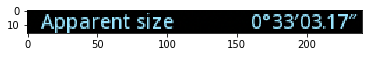

In [11]:
path = 'Sun B\\'
f = open('Sun_B.dat', 'w+')
for img in tqdm(os.listdir(path)):
    try:
        day, time = functions.date(path + img, 'date_sun_B.png')
        direction, height = functions.direction_and_height(path + img, 'direction_sun_B.png')
        size = functions.apparent_sun(path + img, 'apparent_sun_B.png')
    except UnicodeDecodeError:
        continue
    except TesseractError:
        continue
    
    # extract year, month, and day
    try:
        year = day.split('.')[0]
        month = day.split('.')[1]
        d = day.split('.')[2]
    except AttributeError:
        continue
    except IndexError:
        continue
    
    # extract hour, minute, and second
    try:
        hour = time.split('h')[0]
        m = time.split('h')[1].split('m')[0][1] + time.split('h')[1].split('m')[1][0]
        s = time.split('h')[1].split('m')[1].split('.')[0][1] + time.split('h')[1].split('m')[1].split('.')[1][0]
    except AttributeError:
        continue
    except IndexError:
        continue
    
    # extract the degree, minute, and second of the azimuthal angle phi
    try:
        degree_1 = direction.split('°')[0]
        minute_1 = direction.split('°')[1].split('\'')[0]
        second_1 = direction.split('°')[1].split('\'')[1].split('"')[0]
    except IndexError:
        continue
    
    # extract the degree, minute, and second of the polar angle theta
    try:
        degree_2 = height.split('°')[0]
        minute_2 = height.split('°')[1].split('\'')[0]
        second_2 = height.split('°')[1].split('\'')[1].split('"')[0]
    except IndexError:
        continue
    
    # extract the minute and second of the sun's apparent size
    try:
        size_minute = size.split('°')[1].split('\'')[0]
        size_second = size.split('°')[1].split('\'')[1].split('"')[0]
    except IndexError:
        continue
    
    # write the data to the file
    try:
        fig_index = int(img.split('f')[1].split('.')[0])
        f.write('{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\n'.format(fig_index, year, month, d, hour, m, s, \
                                                          degree_1, minute_1, second_1, degree_2, minute_2, second_2, \
                                                                                     size_minute, size_second))
    except UnicodeEncodeError:
        continue
        
f.close()